# __Identifying Key Features of Shortage in Healthcare Workforce__

## __Team a10__

### _Source: Health Resources & Services Administration data warehouse (link: https://data.hrsa.gov/topics/health-workforce/shortage-areas)_

## __I Proposal objective__
Our objective is to analyze key characteristics of healthcare workforce shortage in different states in United States in the past 30 years. We use time series analysis and summary statistics on a challenging dataset composed of workforce shortage data reported by medical facilities and communities in the U.S. Our analysis can assist in predicting shortages, and provide insights for preventing or reducing them.
    

## __II Data Source__
Health Professional Shortage Area (HPSA) is a project mapping geographic areas, populations, or facilities with a shortage of primary care, dental, or mental health providers and services across the U.S. 
It is run since 1978 by the Health Resources and Services Administration (HRSA), a federal agency under the U.S. Department of Health and Human Services.
The project's mission is "*to improve health outcomes and achieve health equity through access to quality services, a skilled health workforce, and innovative, high-value programs.*"

The database helps over 34 federal programs in data-driven decision making and resource allocation. For example, National Health Service Corps – a program bringing healthcare clinicians to people with limited access to healthcare – only works in designated HPSAs.  

The original data includes 65 columns and nearly 65,000 rows. Each row represents an HPSA designation (a medical facility, a geographic location, or a specific population), which was designated by HRSA as a shortage area. The columns include information in the following main categories: medical-related (shortage level, type of facility); technical details of the designation/withdrawal of designation, including HPSA score (0-25);  geographic characteristics (longitude/latitude coordinates, city/county/state, rural classification, distance to the nearest medical facility; and demographics (socio-economic status of populations, type of community).

Our outcome (dependent) variables of interest are Designation Status ("Designated"), HPSA score (0-25, higher score = deeper shortage), and designation duration (not in original data, calculated as (withdrawal date) - (designation date)). We look for the relationships between these outcome variables, indicating the shortages of healthcare professionals, and the other variables in the data.
The dataset was downloaded from the [data downloads](https://data.hrsa.gov/data/download) page on the HRSA website on October 3, 2022, and is updated to September 30, 2022. Further information regarding the data can be found on the [HRSA website](https://data.hrsa.gov/about).

## __III Introduction__
Our research aims to tackle the problem of shortage in healthcare workforces by analyzing characteristics of reported shortages and looking for possible directions to ease the pressure in the healthcare system.<br>
<br>
The public health system in the United States is facing continuously increasing pressure from a growing proportion of an elder population and the epidemic of COVID-19. According to research done by the Center for Workforce Studies at the Association of American Medical Colleges (AAMC), the population of age 65 or older is expected to double between 2000 and 2030, which will propose a much higher demand for healthcare services than younger age groups. On the other hand, physicians require 10-16 years of training, resulting in a gap between the demand and supply of healthcare. The bursting number of hospitalized patients due to COVID-19 facilitated a significant growth in the number of facilities in shortage. In March 2022, American Hospital Association reported that 23% of the member hospitals reported a critical staffing shortage to the government. Moreover, hospitals have seen a decrease of nearly 105,000 employees since February 2020.<br>
<br>
Therefore, it is increasingly urgent for the US government to resolve the shortage in the healthcare workforce. The Health Resources & Services Administration is a government organization that builds a database of Health Professional Shortage Areas (HSPA) that includes the facilities reporting the shortage in workforce, and uses the database for other organizations to determine each facility’s eligibility for funding. By understanding the HSPA dataset, we are able to determine some major trends that are correlated with the shortage.

## __IV Summary__
Our analysis looks at HPSA records from 1970s to 2022 to find correlations between healthcare workforce shortages and 2 dimensions: how HPSA designations vary over time and with respect to the geographical conditions that the facility is located in. We observed that from 1970, records of shortages experienced a gradual increase in numbers, and designations have changed from being geographic-based to population-based HPSAs. High rises in HPSA records often correlate to national pandemics. And by analyzing HPSA claims by state, we find out that the total number of designations correlates to the size of population in each state. By calculating the years it takes to resolve a shortage, we can see that it takes northern and rural states longer to resolve a raised case. Our research also shows that facilities in rural regions are slightly increasing; whereas non-rural cases are increasing at a much faster speed, nearly doubling from 1970s to 2010s. Moreover, the healthcare systems in non-rural regions are facing increasing pressure because of COVID-19. This shows that rural regions are experiencing more shortages in healthcare workforce than before, but towns and cities are experiencing more severe shortages in recent years.

## __V Observations__

### __Time__: How do designations vary over time?
First, we looked at the counts of different designation types over time. As shown in the below line chart, Y-axis represents number of newly designated HPSA in the scope of different designation types. According to the chart, Geographical HPSA was once the dominant designation type, but it dropped drastically and was replaced by HPSA Population in around 1996. Since then, HPSA Population increased a lot and is now the dominant one. Other designation types account for a relatively low proportion in general. 
Another interesting finding is that for HPSA Population, the peaks of its designations after 2000s largely conform with the occurrence of main pandemics. Specifically, the peak at 2002 corresponds to Severe Acute Respiratory Syndrome (SARS), the peak at 2012 corresponds to the worst Whooping Cough in 60 years in the U.S. in 2012, the peak at 2017 corresponds to Zika Virus, and the continuous increase after 2020 is likely correlated to COVID-19. 

Then, we took the number of active designations into account. Active designations refer to those have not been withdrawn. The below graph shows the number of total designations and withdrawn each year, as well as the difference between these two which represents the active designations. According to the graph, we concluded that active shortage designations have an increasing trend overall.

We also calculated the average shortage designation duration and analyzed by time series. According to the graph, the average shortage duration drastically increased from 1980 to 2010, and though experiencing a recess in the next five years, have bounced back since 2015. 

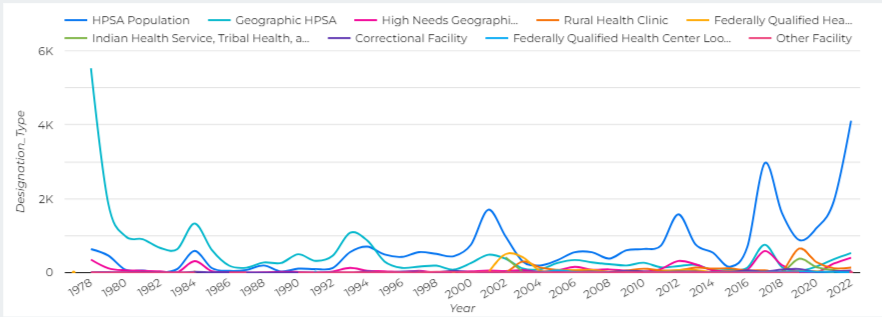 <br>
*Different Designation Type Counts over Time*

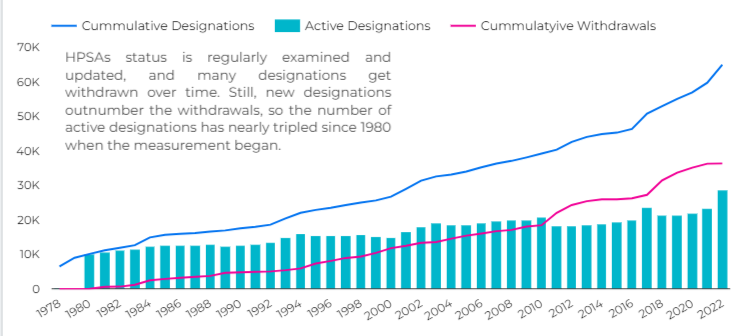<br> 
*Active Designations*

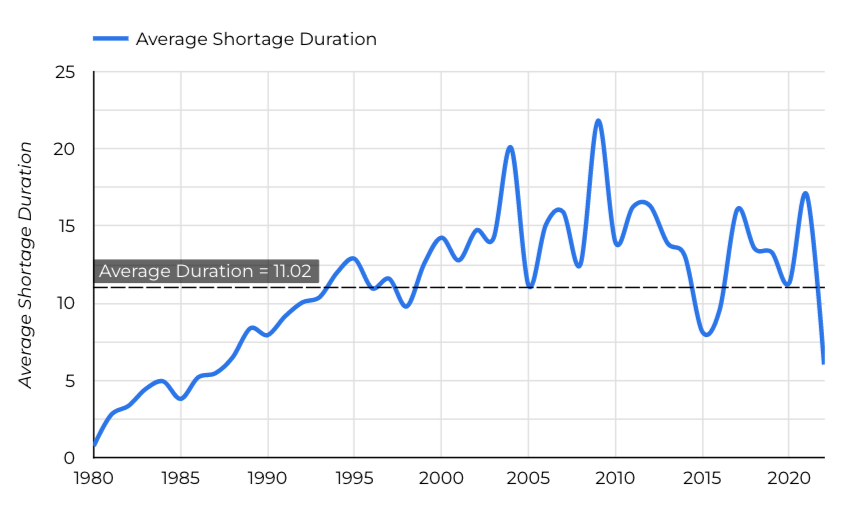<br>
*Average Shortage Duration Over Time in Years

In [ ]:
%%bigquery
SELECT Designation_Type, COUNT(Designation_Type) n_Designation, EXTRACT(YEAR FROM (HPSA_Designation_Date)) as year
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
GROUP BY Designation_Type, year
ORDER BY year DESC, n_Designation DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.12rows/s]


,Designation_Type,n_Designation,year
0,HPSA Population,4106,2022
1,Geographic HPSA,531,2022
2,High Needs Geographic HPSA,405,2022


In [ ]:
%%bigquery
SELECT AVG(EXTRACT(YEAR FROM(Withdrawn_Date))-EXTRACT(YEAR FROM(HPSA_Designation_Date))) as avg_duration, 
           EXTRACT(YEAR FROM(Withdrawn_Date)) as year
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE Withdrawn_Date IS NOT NULL
GROUP BY year
ORDER by year DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.96rows/s]


,avg_duration,year
0,6.104478,2022
1,17.077324,2021
2,11.602644,2020


In [ ]:
%%bigquery
SELECT
  y1.des_year,
  y1.designations,
  y2.withdrawls,
  SUM(designations) OVER(ORDER BY des_year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS tot_designations,
  SUM(withdrawls) OVER(ORDER BY des_year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS tot_withdrawls,
  SUM(designations) OVER(ORDER BY des_year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)- SUM(withdrawls) OVER(ORDER BY des_year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS tot_active_desigantions
FROM (
  SELECT
    des_year,
    COUNT(HPSA_ID) AS designations
  FROM (
    SELECT
      *,
      EXTRACT(YEAR
      FROM
        HPSA_Designation_Date) AS des_year,
      EXTRACT(YEAR
      FROM
        Withdrawn_Date) AS with_year
    FROM
      `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
    WHERE
      EXTRACT(YEAR
      FROM
        HPSA_Designation_Date) > 1970)
  GROUP BY
    des_year) AS y1
LEFT JOIN (
  SELECT
    with_year,
    COUNT(HPSA_ID) AS withdrawls
  FROM (
    SELECT
      *,
      EXTRACT(YEAR
      FROM
        HPSA_Designation_Date) AS des_year,
      EXTRACT(YEAR
      FROM
        Withdrawn_Date) AS with_year
    FROM
      `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
    WHERE
      Withdrawn_Date IS NOT NULL )
  GROUP BY
    with_year) AS y2
ON
  y1.des_year = y2.with_year
ORDER BY
  y1.des_year
LIMIT 5 

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.67rows/s]


,des_year,designations,withdrawls,tot_designations,tot_withdrawls,tot_active_desigantions
0,1978,6540,NaN,6540,NaN,NaN
1,1979,2478,NaN,9018,NaN,NaN
2,1980,1129,63.0,10147,63.0,10084.0
3,1981,1032,550.0,11179,613.0,10566.0
4,1982,720,47.0,11899,660.0,11239.0


### __Geographical__: How does the location of a facility correlate to the level of shortage?
By analyzing HPSA data based on the facilities' locations, we obeserves the following trend: 
1. Total number of designations correlate to the population of each state. 
2. Non-rural regions reports more HSPA areas than rural regions, and the number of non-rural HSPA areas is growing faster because of COVID-19.
3. Southern states tend to have a slightly higher HPSA score. Northern states and rural states take longer to resolve the shortage.  

#### __Analysis on national distribution of HPSA facilities__
To understand how location correlates to the shortage in workforce a medical facility is experiencing, we looked at records of HPSA data in each state. From the distribution of HPSA designations, we are able to make the following observations:
- Total number of designations are correlated to the population of each state. Given California, New York, Pennsylvania, and Florida has the highest number of reported cases. 
- Some types of designations that account for a small proportion of the total number of designations but may be requiring staff with specialized training, are concentrated in specific states, such as there is a comparably high demand for staffs in correctional facilities in Texas.
- As a general trend, there is an increase in HPSA records from facilites in rural region, but with deeper research, we observe a trend of non-rural facilities taking an increasing proportion of the total claims, which we will discuss further.

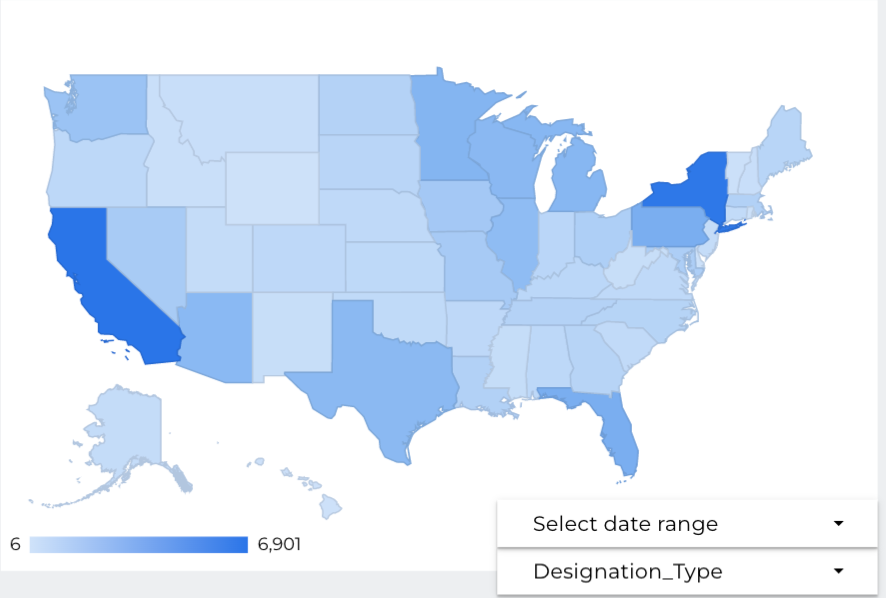<br>
*Number of Designations by State<br>

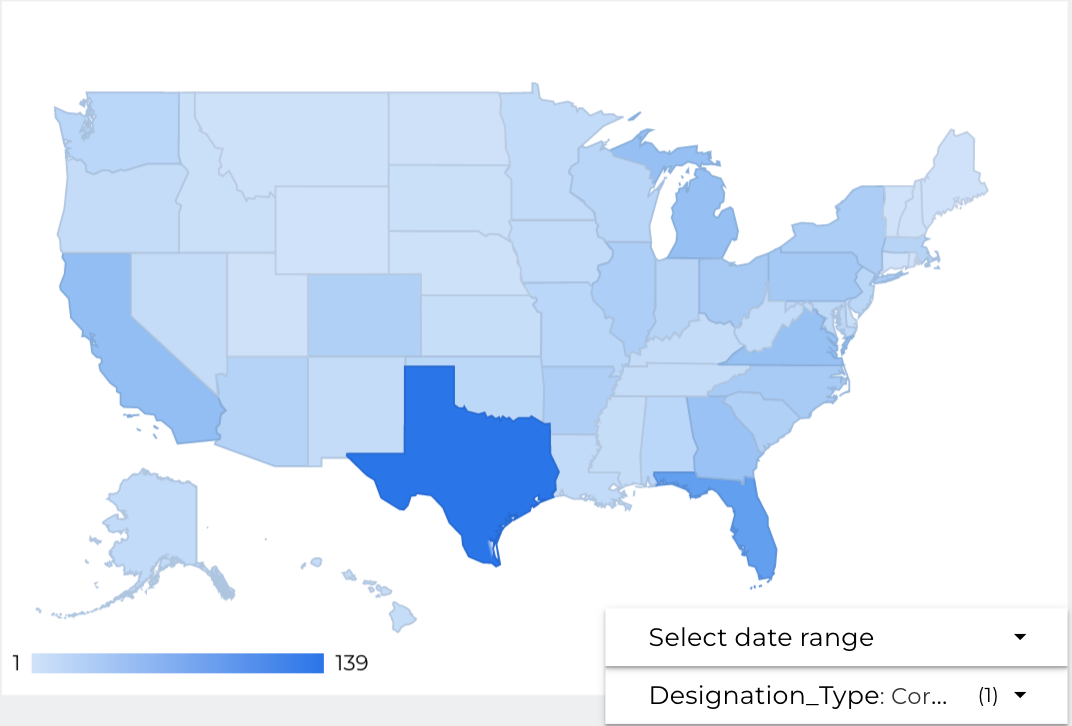<br>
*Number of Designations of Correctional Facilities by State 


In [ ]:
%%bigquery
## State distribution
SELECT State_Name AS state, COUNT(State_Name) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY State_Name
ORDER BY counts DESC
LIMIT 3
## Select Primary_State_Name for a broad view of clinics distribution

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.75rows/s]


,state,counts
0,California,6901
1,New York,6643
2,Pennsylvania,3220


In [ ]:
%%bigquery
## State distribution
SELECT State_Name AS state, COUNT(State_Name) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
WHERE Designation_Type = 'Correctional Facility' #zoom into a specific type of facility
GROUP BY State_Name
ORDER BY counts DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.97rows/s]


,state,counts
0,Texas,139
1,Florida,85
2,California,48


#### __Analysis on rural status of HPSA facilities__ 
By analyzing the change of reported shortages over each decades, we observe a general trend that there is a continuous increase in HPSA reported since 1980s. By analyzing the rural status of HPSA regions over time, we are able to reach the following conclusions:
+50k non rural
-10k rural
- The stacked column chart shows that the overall number of shortage has shortly decreased from 1970s to 1980s, then continually increased every decade since 1980s. A possible explanation to the decrease in HPSA region from 1970 to 1980 could be the recession in 1970 and the drop in fertility rate in the decade (Center for Health Statistics).
- The non-rural regions (population>50k) have consistently had more shortages than rural regions over the past few decades. The proportions of HPSA designations in both rural region and non-rural region are increasing since 1980s. However, the proportion of rural regions grows at a slower rate than the growth rate of non-rural region. The proportion of non-rural region grows rapidly in each decade from 3200 cases in 1970s to 5577 in 2010s, which means that there is increasing shortages in the cities.
- The data after 2020s reflect the immense pressure of hospitalization rate under COVID-19. The HPSA designations reported in 2020, 2021, and 2022 are approximately 59% of designations from 2010 to 2020. We can also conclude that COVID-19 has proposed large pressure to healthcare system in non-rural regions, as the number of HSPA cases in non-rural areas are almost 3 times the number reported from facilities in rural areas, which echoes with the fact that COVID-19 has a much higher spread rate in regions with high population density.

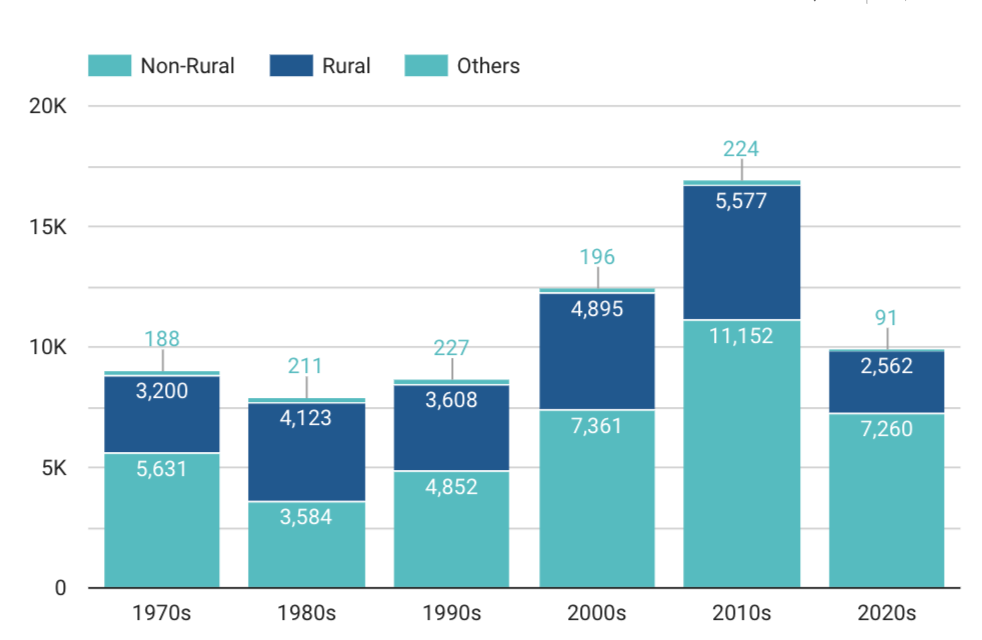
<br>
*New designation counts by decades and rural status

In [ ]:
%%bigquery
## Rural
SELECT Rural_Status, COUNT(Rural_Status) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY Rural_Status
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.09rows/s]


,Rural_Status,counts
0,Rural,23965
1,Non-Rural,39840
2,Others,1137


In [ ]:
%%bigquery
#graph
UPDATE `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`  
SET Rural_Status = 'Others' 
WHERE Rural_Status = 'Unknown' 
OR Rural_Status = 'Partially Rural' 
OR Rural_Status = 'Not Applicable'
OR Rural_Status = ''
OR Rural_Status IS NULL;

SELECT Rural_Status,
CASE
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2020 THEN '2020s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2010 THEN '2010s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2000 THEN '2000s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1990 THEN '1990s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1980 THEN '1980s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1970 THEN '1970s'
ELSE '<1970' END Designation_decade,
COUNT(HPSA_ID) AS num_designations
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa` 
GROUP BY Rural_Status,Designation_decade
ORDER BY Designation_decade DESC
LIMIT 3;

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.77rows/s]


,Rural_Status,Designation_decade,num_designations
0,Rural,2020s,2562
1,Non-Rural,2020s,7260
2,Others,2020s,91


#### __Analysis on duration and average score of HPSA facilities in different states__
Average HPSA score and the duration of a shortage is analyzed to illustrate the severeness and elasticity of the healthcare system in each state. HPSA score measures 4 aspects of a facility: population-to-provider ratio, percent of population below
100% Federal poverty level, infant health index, and travel time to nearest source of care outside of HPSA designation area. It ranges from 0 to 25, and illustrates the accessibility of healthcare services for the population in the HPSA designation area. The higher the score, the harder it is for the population in the HPSA designated area to seek healthcare services, and the more urgent to resolve the shortage. 
The duration of the shortage is measured with the withdrawn HPSA designations, and is calculated by the years between designation date and withdrawn date. It evaluates the government's ability to resolve a shortage. From our analysis, we can make the following observations: 
- In Average HPSA score, we observe a trend that generally speaking, southern states have higher average HPSA scores than northern states. This could result from a higher percent of population below federal poverty line in those states, or maybe the travel time aspect in scoring HPSA region.
- Generally speaking, it takes northern and rural states a longer time to resolve the shortage. This may be result from more dispersed healthcare resources or an uneven distribution of healthcare facilities. In future research, we are going to collect more data with respect to healthcare resources in rural and northern states to further understand the situation. 

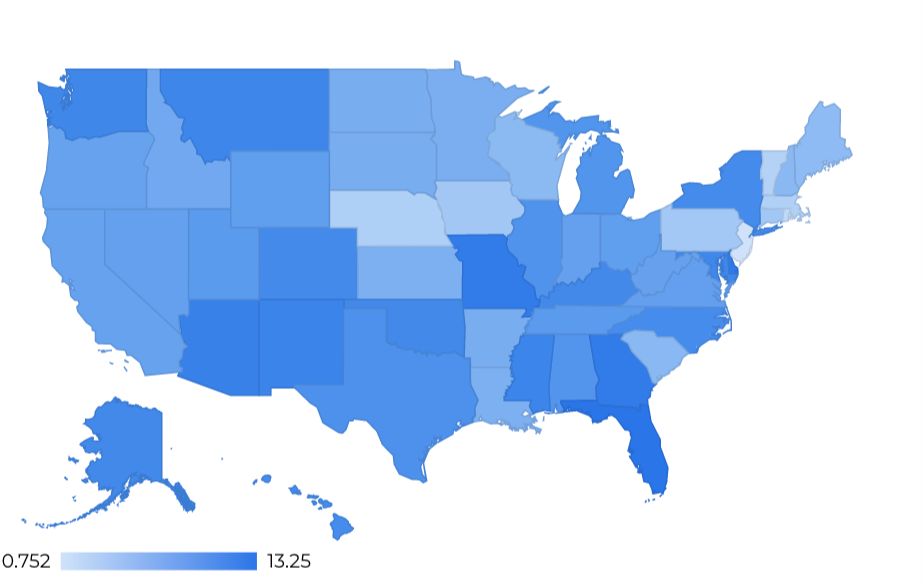<br>
*Average HPSA score (range from 0~25) by state <br>
<br>
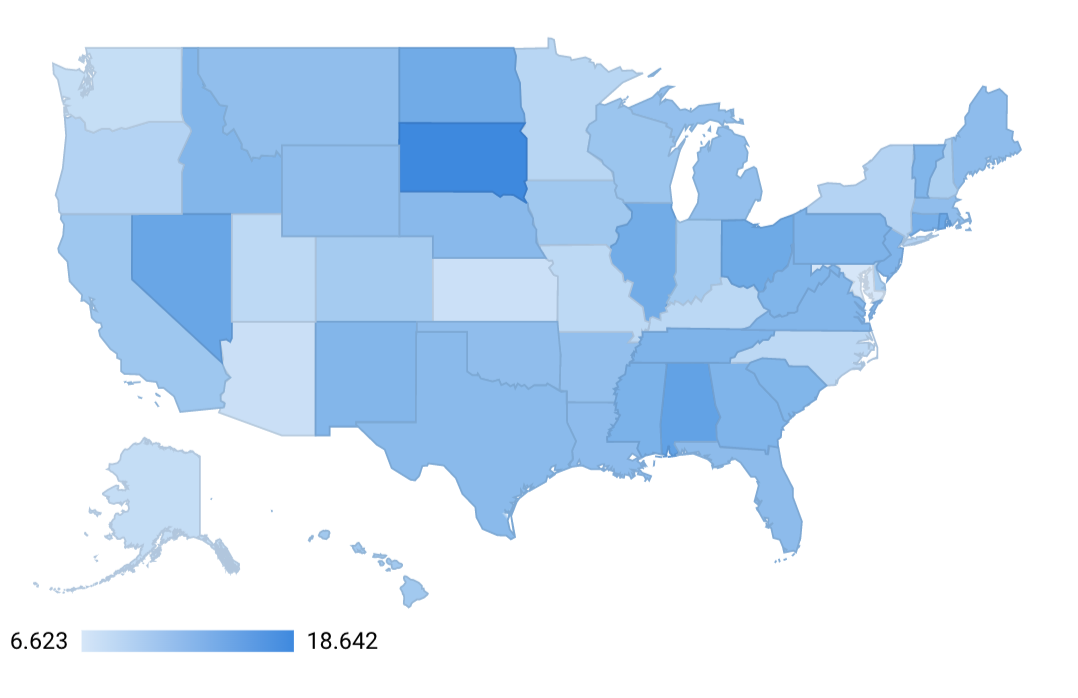<br>
*Average duration of shortage by state (in years)

In [ ]:
%%bigquery
SELECT AVG(HPSA_Score) as avg_score, 
       State_Name AS state          
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE State_Name != 'Marshall Islands'
AND State_Name != 'American Samoa'
AND State_Name != 'Federated States of Micronesia'
AND State_Name != 'Northern Mariana Islands'
GROUP BY State_Name
ORDER by avg_score DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.20rows/s]


,avg_score,state
0,13.249533,Florida
1,12.717608,District of Columbia
2,12.662420,Delaware


In [ ]:
%%bigquery
SELECT AVG(EXTRACT(YEAR FROM(Withdrawn_Date))-EXTRACT(YEAR FROM(HPSA_Designation_Date))) as avg_duration, 
       State_Name AS state          
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE State_Name != "Republic of Palau"
GROUP BY State_Name
ORDER by avg_duration DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.84rows/s]


,avg_duration,state
0,22.736453,Nevada
1,20.696429,Delaware
2,18.979266,South Dakota


## __VI Conclusion__

#### __Main Findings__
In summary, our main findings are the following:
- The staffing shortage problem has been getting much worse over the years; the number of active shortage designations has almost tripled since the 80s, and it has dramatically increased since the outbreak of the Covid-19 pandemic.
- The duration of the shortage and the severity of the problem is higher in rural, northern states. However, if we look at the absolute values, HPSA designations in non-rural regions are growing even faster than in rural areas.
- The main designation type has switched from "Geographic" to "Population" over the years. This means the shortage doesn't necessarily depend on specific geographical areas anymore, but it's mostly affecting different groups of the population.
- The average duration of the shortage fluctuates a lot in general; Overall, the average duration is about 11 years. It seemed to get better between 2009 and 2015, but it has more recently decreased to an average of 6 years after reaching a peak of 9 years.

#### __Next Steps__
Our recommendation would be to conduct deeper research into the following areas:

- Why shortage duration is so long in rural northern states. Maybe because healthcare resources and facilities are more unevenly distributed? It is also possible that healthcare workers are less willing to go to remote (cold) areas.
- How and where the US government has decided to allocate its funding across states and different designation types. How much money was invested and where? How is an uneven distribution of resources affecting the shortage? Could the budget possibly be expanded to fix this issue?
- How hospital staffing challenges have affected the mental and physical burden that has been placed on current healthcare employees, and if and how this has affected the quality of their work, creating further negative consequences for patients.
- How much the pandemic has worsened the problem of healthcare staffing shortages so far, and how it's going to keep impacting it in the future. Studies show that since the pandemic, staffing shortages have become the nation’s top patient safety concern, making Americans wait longer times even when seeking care in life-threatening emergencies, or be turned away entirely, according to ECRI, a nonprofit patient safety organization. This is a real national emergency affecting mostly nurses, medical lab workers, and paramedics.


## __VII Citations__
- "Challenges Facing America’s Health Care Workforce as the U.S. Enters Third Year of COVID-19 Pandemic". American Hospital Association. https://www.aha.org/lettercomment/2022-03-01-aha-provides-information-congress-re-challenges-facing-americas-health
- "Scoring Shortage Designations." Health Resources & Services Administration. https://bhw.hrsa.gov/workforce-shortage-areas/shortage-designation/scoring
- "Staff Shortages Choking U.S. Health Care System". U.S. News & World Report. https://www.usnews.com/news/health-news/articles/2022-07-28/staff-shortages-choking-u-s-health-care-system?context=amp
- "Supply and Demand in the Health Care Workforce". Institute of Medicine (US) National Cancer Policy Forum.
https://www.ncbi.nlm.nih.gov/books/NBK215247/
- "The U.S. Recession and the Birth Rate." Population Reference Bureau. https://www.prb.org/resources/the-u-s-recession-and-the-birth-rate/

***

# __Appendix I: Dashboard__

Link: [dashboard](https://datastudio.google.com/reporting/1e4d8441-ab63-42bc-94ac-1a372e8191d8)

<img src="dashboard.png">

# __Appendix II: Data Cleaning and Observations on the Original Dataset__

## __Data Cleaning__

Our original data has 65 columns and 64,942 rows. 
Our goal is to eliminate the duplicated columns and columns that are mainly NULL or single value in our dataset.  <br>
As a result, we decide to remove 24 columns from our data which leaves us with __41__ columns for further analysis.<br>
Here are the columns that we decided to remove from our dataset and reasons behind our decision.

### 24 Columns removed and reasoning
_HPSA_Geography_Identification_Number:_ we have other data for geographical location and are more widely used such as long&lat.  <br>
_Common_State_Abbreviation:_  we have other data for geographical location <br>
_HPSA_Name:_  we'll keep ID instead as our unique key to identify each facility <br>
_HPSA_Discipline_Class:_ - remove because the only value is Primary Care <br>
_BHCMIS_Organization_Identification_Number:_ we will use  <br>
_Break_in_Designation:_  remove because the only value is false <br>
_Common_County_Name:_  redundancy <br>
_Common_State_County_FIPS_Code:_  we will use county name instead <br>
_Common_State_FIPS_Code:_ redundancy <br>
_Common_State_Name:_ redundancy <br>
_State_Abbreviation:_ redundancy <br>
_County_or_County_Equivalent_Federal_Information_Processing_Standard_Code:_ redundancy <br>
_Discipline_Class_Number:_ All data is 1 <br>
_HPSA_Component_State_Abbreviation:_ All null<br>
_HPSA_Component_Type_Code:_ abbreviate of types<br>
_HPSA_Postal_Code:_ mostly blank <br>
_Primary_State_FIPS_Code:_ the same as name, delete code<br>
_Provider_Type:_ all the 58082 data that is not null is Not Applicable<br>
_State_FIPS_Code:_ The same as State_Name<br>
_U_S_Mexico_Border_County_Indicator:_ no information<br>
_Data_Warehouse_Record_Create_Date:_ all is today<br>
_Data_Warehouse_Record_Create_Date_Text:_ all is today<br>
_Primary_State_Name:_ redundancy<br>
_string_field_64:_ all null<br>

In [ ]:
#data cleaning code IN PLACE
# ALTER TABLE `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
# DROP COLUMN HPSA_Geography_Identification_Number,
# DROP COLUMN Common_State_Abbreviation,
# DROP COLUMN HPSA_Name,
# DROP COLUMN HPSA_Discipline_Class,
# DROP COLUMN BHCMIS_Organization_Identification_Number,
# DROP COLUMN Break_in_Designation,
# DROP COLUMN Common_County_Name,
# DROP COLUMN Common_State_County_FIPS_Code,
# DROP COLUMN Common_State_FIPS_Code,
# DROP COLUMN Common_State_Name,
# DROP COLUMN County_or_County_Equivalent_Federal_Information_Processing_Standard_Code,
# DROP COLUMN  State_Abbreviation,
# DROP COLUMN Discipline_Class_Number,
# DROP COLUMN HPSA_Component_State_Abbreviation,
# DROP COLUMN HPSA_Component_Type_Code,
# DROP COLUMN HPSA_Postal_Code,
# DROP COLUMN Primary_State_FIPS_Code,
# DROP COLUMN Provider_Type,
# DROP COLUMN State_FIPS_Code,
# DROP COLUMN U_S____Mexico_Border_County_Indicator,
# DROP COLUMN Data_Warehouse_Record_Create_Date,
# DROP COLUMN Data_Warehouse_Record_Create_Date_Text,
# DROP COLUMN string_field_64,
# DROP COLUMN Primary_State_Name

In [ ]:
%%bigquery
SELECT * 
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa` 
LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.06rows/s]


,HPSA_ID,Designation_Type,HPSA_Score,Primary_State_Abbreviation,HPSA_Status,HPSA_Designation_Date,HPSA_Designation_Last_Update_Date,Metropolitan_Indicator,HPSA_Degree_of_Shortage,Withdrawn_Date,...,HPSA_Provider_Ratio_Goal,HPSA_Resident_Civilian_Population,HPSA_Shortage,HPSA_Status_Code,HPSA_Type_Code,HPSA_Withdrawn_Date_String,Rural_Status_Code,State_and_County_Federal_Information_Processing_Standard_Code,State_Name,U_S____Mexico_Border_100_Kilometer_Indicator
0,101999012C,"Indian Health Service, Tribal Health, and Urba...",20,AL,Designated,2002-10-26,2021-09-12,Non-Metropolitan,,None,...,,NaN,NaN,D,ITU,None,R,01053,Alabama,N
1,101999019Q,Rural Health Clinic,18,AL,Withdrawn,2018-11-29,2020-02-06,Unknown,,2020-02-06,...,,NaN,NaN,W,RHC,2020-02-06,R,01087,Alabama,N
2,101999019O,Rural Health Clinic,15,AL,Withdrawn,2017-10-18,2020-09-18,Unknown,,2020-09-18,...,,NaN,NaN,W,RHC,2020-09-18,R,01095,Alabama,N
3,101999019N,Rural Health Clinic,18,AL,Withdrawn,2017-07-13,2020-02-06,Unknown,,2020-02-06,...,,NaN,NaN,W,RHC,2020-02-06,R,01123,Alabama,N
4,101999019M,Rural Health Clinic,21,AL,Withdrawn,2017-06-05,2020-02-06,Unknown,,2020-02-06,...,,NaN,NaN,W,RHC,2020-02-06,R,01005,Alabama,N


## __II Understanding processed data__
To determine the major factors that leads to a shortage in healthcare workforce, we will devide our independent data entries into 3 major groups. __geographical data, __time data__, and __categorial data__ that are related to healthcare industry.<br>
In this section, summary statistics are conducted to understand each group of factors in our cleaned data. <br>

### Geographical information: How are the facilities distributed around US?
To understand the geographical information of our data, we looked at 3 parameters, indicating if the facility is in a city, a metropolitan city, or rural region as potential indication of the financial status of the attendants for each facility. 
Our observations are as following:<br>
1. Majority of the facilities are located in rural region.
2. Numbers of facilities in each state seems to be related to population of each state, so further normalization (such as facility counts over population) may be needed to better understand our data.
3. Of the cities that a comparatively minor sector of facilites located in, Los Angeles, Chicago, and Anchorage have the most facilities reporting workforce shortage.

In [ ]:
%%bigquery
## Rural
SELECT Rural_Status, COUNT(Rural_Status) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY Rural_Status

Downloading: 100%|██████████| 6/6 [00:01<00:00,  3.63rows/s]


,Rural_Status,counts
0,Rural,23965
1,Non-Rural,39840
2,Unknown,276
3,Partially Rural,781
4,Not Applicable,21
5,,59


In [ ]:
%%bigquery
## State distribution
SELECT State_Name AS state, COUNT(State_Name) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY State_Name
ORDER BY counts DESC
LIMIT 10
## Select Primary_State_Name for a broad view of clinics distribution

Downloading: 100%|██████████| 10/10 [00:02<00:00,  3.55rows/s]


,state,counts
0,California,6901
1,New York,6643
2,Pennsylvania,3220
3,Florida,3210
4,Minnesota,2817
5,Michigan,2719
6,Wisconsin,2654
7,Texas,2592
8,Arizona,2585
9,Illinois,2455


In [ ]:
%%bigquery
## Cities
SELECT HPSA_City, COUNT(HPSA_City) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY HPSA_City
ORDER BY counts DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.82rows/s]


,HPSA_City,counts
0,,58426
1,Los Angeles,39
2,Chicago,35
3,Anchorage,30
4,New York,28
5,Houston,25
6,Portland,23
7,Phoenix,22
8,Newport,20
9,Miami,20


### Time information: How are designations and resolutions distributed over the time span in our data?
Our earliest entry dated back to 1970, with the latest entry in 2022-09-30. We looked at the time span of each shortage record regarding the time it takes for the shortage from designation to withdrawal. Our obervations are as following:
1. Average year of current facilities that reported of shortages is 2021. 
2. There is a steady increase in numbers of designations since 1980s, and there is a dramatic increase in 2020s.
3. The most frequent duration of shortages (from report to withdrawal) is within 5 years from designation. This time duration covers about 36% of all cases.

In [ ]:
%%bigquery
#data summary regarding time aspect of dataset
SELECT MIN(HPSA_Designation_Date) AS earliest_designation, 
AVG(EXTRACT(YEAR FROM (HPSA_Designation_Last_Update_Date))) AS average_update_date,
MAX(HPSA_Designation_Last_Update_Date) AS latest_Update
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`;

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.89s/rows]


,earliest_designation,average_update_date,latest_Update
0,1970-01-01,2012.755828,2022-09-30


In [ ]:
%%bigquery
#filtering for active designated facilities
SELECT AVG(EXTRACT (YEAR FROM HPSA_Designation_Last_Update_Date)) AS average_Update_date_Designated
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE HPSA_Status = "Designated"

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.72s/rows]


,average_Update_date_Designated
0,2021.175658


In [ ]:
%%bigquery
#dividing designation date to decades
SELECT 
CASE
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2020 THEN '2020s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2010 THEN '2010s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2000 THEN '2000s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1990 THEN '1990s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1980 THEN '1980s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1970 THEN '1970s'
ELSE '<1970' END Designation_decade,
COUNT(HPSA_ID) AS num_designations
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa` 
GROUP BY Designation_decade
ORDER BY Designation_decade DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.11rows/s]


,Designation_decade,num_designations
0,2020s,9913
1,2010s,16953
2,2000s,12452
3,1990s,8687
4,1980s,7918
5,1970s,9019


In [ ]:
%%bigquery
#duration of designation(designation to withdrawal/current_date) by categories
SELECT CASE
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 5 THEN '0-5 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 10 THEN '5-10 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 15 THEN '10-15 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 20 THEN '15-20 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 25 THEN '20-25 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 60 THEN '25+ years'
ELSE 'Unknown' END AS Years_from_designation_to_withdrawal,
COUNT(HPSA_ID) AS count_occasions
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE HPSA_Designation_Date IS NOT NULL
GROUP BY Years_from_designation_to_withdrawal
ORDER BY count_occasions DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.32rows/s]


,Years_from_designation_to_withdrawal,count_occasions
0,0-5 years,23688
1,5-10 years,13495
2,10-15 years,8460
3,15-20 years,8203
4,25+ years,6793
5,20-25 years,4303


### Categorial information: 
### 1. What are the different designation types?
To understand the different designation types, we dug into HRSA's site (link: https://bhw.hrsa.gov/workforce-shortage-areas/shortage-designation), which provides us a brief introduction to different designation types. <br>
Definition of different HPSA(Health Professional Shortage Area):
- HPSA Population: A shortage of providers for a specific group of people within a defined geographic area (e.g., low-income, migrant farm workers)
- Geographic HPSA: A shortage of providers for an entire group of people within a defined geographic area
- Facility HPSA: Rural Health Clinic, Federally Qualified Health Center, etc.

### 2. What are the differences and counts of disciplines  of the facilities? 
The facilities are divided into 3 categories: __primary care__, __dental care__, and __mental health__. Our data only includes primary care facilities.

In [ ]:
%%bigquery
SELECT Designation_Type, COUNT(Designation_Type) n_Designation
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
GROUP BY Designation_Type
ORDER BY n_Designation DESC

Downloading: 100%|██████████| 9/9 [00:01<00:00,  5.79rows/s]


,Designation_Type,n_Designation
0,HPSA Population,30561
1,Geographic HPSA,23194
2,High Needs Geographic HPSA,4327
3,Rural Health Clinic,2655
4,Federally Qualified Health Center,1577
5,"Indian Health Service, Tribal Health, and Urba...",1146
6,Correctional Facility,962
7,Federally Qualified Health Center Look A Like,272
8,Other Facility,248


In [ ]:
%%bigquery
SELECT HPSA_Discipline_Class
FROM `ba775-fall22-a10.health_workforce_shortage_areas.after_cleaning_last_33_result`
GROUP BY HPSA_Discipline_Class
#we decided to remove this column from our data because all values are "Primary Care"

Downloading: 100%|██████████| 1/1 [00:03<00:00,  3.45s/rows]


,HPSA_Discipline_Class
0,Primary Care


# __Identifying Key Features of Shortage in Healthcare Workforce__

## __Team a10__

### _Source: Health Resources & Services Administration data warehouse (link: https://data.hrsa.gov/topics/health-workforce/shortage-areas)_

## __I Proposal objective__
Our objective is to analyze key characteristics of healthcare workforce shortage in different states in United States in the past 30 years. We use time series analysis and summary statistics on a challenging dataset composed of workforce shortage data reported by medical facilities and communities in the U.S. Our analysis can assist in predicting shortages, and provide insights for preventing or reducing them.
    

## __II Data Source__
Health Professional Shortage Area (HPSA) is a project mapping geographic areas, populations, or facilities with a shortage of primary care, dental, or mental health providers and services across the U.S. 
It is run since 1978 by the Health Resources and Services Administration (HRSA), a federal agency under the U.S. Department of Health and Human Services.
The project's mission is "*to improve health outcomes and achieve health equity through access to quality services, a skilled health workforce, and innovative, high-value programs.*"

The database helps over 34 federal programs in data-driven decision making and resource allocation. For example, National Health Service Corps – a program bringing healthcare clinicians to people with limited access to healthcare – only works in designated HPSAs.  

The original data includes 65 columns and nearly 65,000 rows. Each row represents an HPSA designation (a medical facility, a geographic location, or a specific population), which was designated by HRSA as a shortage area. The columns include information in the following main categories: medical-related (shortage level, type of facility); technical details of the designation/withdrawal of designation, including HPSA score (0-25);  geographic characteristics (longitude/latitude coordinates, city/county/state, rural classification, distance to the nearest medical facility; and demographics (socio-economic status of populations, type of community).

Our outcome (dependent) variables of interest are Designation Status ("Designated"), HPSA score (0-25, higher score = deeper shortage), and designation duration (not in original data, calculated as (withdrawal date) - (designation date)). We look for the relationships between these outcome variables, indicating the shortages of healthcare professionals, and the other variables in the data.
The dataset was downloaded from the [data downloads](https://data.hrsa.gov/data/download) page on the HRSA website on October 3, 2022, and is updated to September 30, 2022. Further information regarding the data can be found on the [HRSA website](https://data.hrsa.gov/about).

## __III Introduction__
Our research aims to tackle the problem of shortage in healthcare workforces by analyzing characteristics of reported shortages and looking for possible directions to ease the pressure in the healthcare system.<br>
<br>
The public health system in the United States is facing continuously increasing pressure from a growing proportion of an elder population and the epidemic of COVID-19. According to research done by the Center for Workforce Studies at the Association of American Medical Colleges (AAMC), the population of age 65 or older is expected to double between 2000 and 2030, which will propose a much higher demand for healthcare services than younger age groups. On the other hand, physicians require 10-16 years of training, resulting in a gap between the demand and supply of healthcare. The bursting number of hospitalized patients due to COVID-19 facilitated a significant growth in the number of facilities in shortage. In March 2022, American Hospital Association reported that 23% of the member hospitals reported a critical staffing shortage to the government. Moreover, hospitals have seen a decrease of nearly 105,000 employees since February 2020.<br>
<br>
Therefore, it is increasingly urgent for the US government to resolve the shortage in the healthcare workforce. The Health Resources & Services Administration is a government organization that builds a database of Health Professional Shortage Areas (HSPA) that includes the facilities reporting the shortage in workforce, and uses the database for other organizations to determine each facility’s eligibility for funding. By understanding the HSPA dataset, we are able to determine some major trends that are correlated with the shortage.

## __IV Summary__
Our analysis looks at HPSA records from 1970s to 2022 to find correlations between healthcare workforce shortages and 2 dimensions: how HPSA designations vary over time and with respect to the geographical conditions that the facility is located in. We observed that from 1970, records of shortages experienced a gradual increase in numbers, and designations have changed from being geographic-based to population-based HPSAs. High rises in HPSA records often correlate to national pandemics. And by analyzing HPSA claims by state, we find out that the total number of designations correlates to the size of population in each state. By calculating the years it takes to resolve a shortage, we can see that it takes northern and rural states longer to resolve a raised case. Our research also shows that facilities in rural regions are slightly increasing; whereas non-rural cases are increasing at a much faster speed, nearly doubling from 1970s to 2010s. Moreover, the healthcare systems in non-rural regions are facing increasing pressure because of COVID-19. This shows that rural regions are experiencing more shortages in healthcare workforce than before, but towns and cities are experiencing more severe shortages in recent years.

## __V Observations__

### __Time__: How do designations vary over time?
First, we looked at the counts of different designation types over time. As shown in the below line chart, Y-axis represents number of newly designated HPSA in the scope of different designation types. According to the chart, Geographical HPSA was once the dominant designation type, but it dropped drastically and was replaced by HPSA Population in around 1996. Since then, HPSA Population increased a lot and is now the dominant one. Other designation types account for a relatively low proportion in general. 
Another interesting finding is that for HPSA Population, the peaks of its designations after 2000s largely conform with the occurrence of main pandemics. Specifically, the peak at 2002 corresponds to Severe Acute Respiratory Syndrome (SARS), the peak at 2012 corresponds to the worst Whooping Cough in 60 years in the U.S. in 2012, the peak at 2017 corresponds to Zika Virus, and the continuous increase after 2020 is likely correlated to COVID-19. 

Then, we took the number of active designations into account. Active designations refer to those have not been withdrawn. The below graph shows the number of total designations and withdrawn each year, as well as the difference between these two which represents the active designations. According to the graph, we concluded that active shortage designations have an increasing trend overall.

We also calculated the average shortage designation duration and analyzed by time series. According to the graph, the average shortage duration drastically increased from 1980 to 2010, and though experiencing a recess in the next five years, have bounced back since 2015. 

<figure><img src='Different Designation Type Counts over Time.png' style="width: 80%">
<figcaption> Different Designation Type Counts over Time</figcaption></figure>

<figure><img src = 'active designations.png' style="width: 80%"><figcaption> Count of Active (Not Withdrawn) Shortage Designations over Time</figcaption></figure>

<figure><img src='avg_dur_time.png' style="width: 60%"><figcaption>Average Shortage Duration Over Time in Years</figcaption></figure>

In [ ]:
%%bigquery
SELECT Designation_Type, COUNT(Designation_Type) n_Designation, EXTRACT(YEAR FROM (HPSA_Designation_Date)) as year
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
GROUP BY Designation_Type, year
ORDER BY year DESC, n_Designation DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.12rows/s]


,Designation_Type,n_Designation,year
0,HPSA Population,4106,2022
1,Geographic HPSA,531,2022
2,High Needs Geographic HPSA,405,2022


In [ ]:
%%bigquery
SELECT AVG(EXTRACT(YEAR FROM(Withdrawn_Date))-EXTRACT(YEAR FROM(HPSA_Designation_Date))) as avg_duration, 
           EXTRACT(YEAR FROM(Withdrawn_Date)) as year
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE Withdrawn_Date IS NOT NULL
GROUP BY year
ORDER by year DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.96rows/s]


,avg_duration,year
0,6.104478,2022
1,17.077324,2021
2,11.602644,2020


In [ ]:
%%bigquery
SELECT
  y1.des_year,
  y1.designations,
  y2.withdrawls,
  SUM(designations) OVER(ORDER BY des_year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS tot_designations,
  SUM(withdrawls) OVER(ORDER BY des_year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS tot_withdrawls,
  SUM(designations) OVER(ORDER BY des_year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)- SUM(withdrawls) OVER(ORDER BY des_year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS tot_active_desigantions
FROM (
  SELECT
    des_year,
    COUNT(HPSA_ID) AS designations
  FROM (
    SELECT
      *,
      EXTRACT(YEAR
      FROM
        HPSA_Designation_Date) AS des_year,
      EXTRACT(YEAR
      FROM
        Withdrawn_Date) AS with_year
    FROM
      `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
    WHERE
      EXTRACT(YEAR
      FROM
        HPSA_Designation_Date) > 1970)
  GROUP BY
    des_year) AS y1
LEFT JOIN (
  SELECT
    with_year,
    COUNT(HPSA_ID) AS withdrawls
  FROM (
    SELECT
      *,
      EXTRACT(YEAR
      FROM
        HPSA_Designation_Date) AS des_year,
      EXTRACT(YEAR
      FROM
        Withdrawn_Date) AS with_year
    FROM
      `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
    WHERE
      Withdrawn_Date IS NOT NULL )
  GROUP BY
    with_year) AS y2
ON
  y1.des_year = y2.with_year
ORDER BY
  y1.des_year
LIMIT 5 

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.67rows/s]


,des_year,designations,withdrawls,tot_designations,tot_withdrawls,tot_active_desigantions
0,1978,6540,NaN,6540,NaN,NaN
1,1979,2478,NaN,9018,NaN,NaN
2,1980,1129,63.0,10147,63.0,10084.0
3,1981,1032,550.0,11179,613.0,10566.0
4,1982,720,47.0,11899,660.0,11239.0


### __Geographical__: How does the location of a facility correlate to the level of shortage?
By analyzing HPSA data based on the facilities' locations, we obeserves the following trend: 
1. Total number of designations correlate to the population of each state. 
2. Non-rural regions reports more HSPA areas than rural regions, and the number of non-rural HSPA areas is growing faster because of COVID-19.
3. Southern states tend to have a slightly higher HPSA score. Northern states and rural states take longer to resolve the shortage.  

#### __Analysis on national distribution of HPSA facilities__
To understand how location correlates to the shortage in workforce a medical facility is experiencing, we looked at records of HPSA data in each state. From the distribution of HPSA designations, we are able to make the following observations:
- Total number of designations are correlated to the population of each state. Given California, New York, Pennsylvania, and Florida has the highest number of reported cases. 
- Some types of designations that account for a small proportion of the total number of designations but may be requiring staff with specialized training, are concentrated in specific states, such as there is a comparably high demand for staffs in correctional facilities in Texas.
- As a general trend, there is an increase in HPSA records from facilites in rural region, but with deeper research, we observe a trend of non-rural facilities taking an increasing proportion of the total claims, which we will discuss further.

<table>
    <tr>
        <td> 
            <figure> <img src="map_desig_tot.png" alt="Number of Designations by State" style="width: 400px">
            <figcaption align = "center"> Number of Designations by State </figcaption>
            </figure> 
        </td>
        <td>  
            <figure> <img src="map_desig_corrfa.png" alt="Number of Designations of Correctional Facilities by State" style="width: 400px">
            <figcaption align = "center"> Number of Designations of Correctional Facilities by State </figcaption>
            </figure>  
        </td>
    </tr>
</table>


In [ ]:
%%bigquery
## State distribution
SELECT State_Name AS state, COUNT(State_Name) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY State_Name
ORDER BY counts DESC
LIMIT 3
## Select Primary_State_Name for a broad view of clinics distribution

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.75rows/s]


,state,counts
0,California,6901
1,New York,6643
2,Pennsylvania,3220


In [ ]:
%%bigquery
## State distribution
SELECT State_Name AS state, COUNT(State_Name) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
WHERE Designation_Type = 'Correctional Facility' #zoom into a specific type of facility
GROUP BY State_Name
ORDER BY counts DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.97rows/s]


,state,counts
0,Texas,139
1,Florida,85
2,California,48


#### __Analysis on rural status of HPSA facilities__ 
By analyzing the change of reported shortages over each decades, we observe a general trend that there is a continuous increase in HPSA reported since 1980s. By analyzing the rural status of HPSA regions over time, we are able to reach the following conclusions:
+50k non rural
-10k rural
- The stacked column chart shows that the overall number of shortage has shortly decreased from 1970s to 1980s, then continually increased every decade since 1980s. A possible explanation to the decrease in HPSA region from 1970 to 1980 could be the recession in 1970 and the drop in fertility rate in the decade (Center for Health Statistics).
- The non-rural regions (population>50k) have consistently had more shortages than rural regions over the past few decades. The proportions of HPSA designations in both rural region and non-rural region are increasing since 1980s. However, the proportion of rural regions grows at a slower rate than the growth rate of non-rural region. The proportion of non-rural region grows rapidly in each decade from 3200 cases in 1970s to 5577 in 2010s, which means that there is increasing shortages in the cities.
- The data after 2020s reflect the immense pressure of hospitalization rate under COVID-19. The HPSA designations reported in 2020, 2021, and 2022 are approximately 59% of designations from 2010 to 2020. We can also conclude that COVID-19 has proposed large pressure to healthcare system in non-rural regions, as the number of HSPA cases in non-rural areas are almost 3 times the number reported from facilities in rural areas, which echoes with the fact that COVID-19 has a much higher spread rate in regions with high population density.

<figure><img src = 'desig_counts_rural.png', style="width:80%">
<figcaption>New designation counts by decades and rural status</figcaption></figure>

In [ ]:
%%bigquery
## Rural
SELECT Rural_Status, COUNT(Rural_Status) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY Rural_Status
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.09rows/s]


,Rural_Status,counts
0,Rural,23965
1,Non-Rural,39840
2,Others,1137


In [ ]:
%%bigquery
#graph
UPDATE `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`  
SET Rural_Status = 'Others' 
WHERE Rural_Status = 'Unknown' 
OR Rural_Status = 'Partially Rural' 
OR Rural_Status = 'Not Applicable'
OR Rural_Status = ''
OR Rural_Status IS NULL;

SELECT Rural_Status,
CASE
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2020 THEN '2020s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2010 THEN '2010s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2000 THEN '2000s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1990 THEN '1990s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1980 THEN '1980s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1970 THEN '1970s'
ELSE '<1970' END Designation_decade,
COUNT(HPSA_ID) AS num_designations
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa` 
GROUP BY Rural_Status,Designation_decade
ORDER BY Designation_decade DESC
LIMIT 3;

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.77rows/s]


,Rural_Status,Designation_decade,num_designations
0,Rural,2020s,2562
1,Non-Rural,2020s,7260
2,Others,2020s,91


#### __Analysis on duration and average score of HPSA facilities in different states__
Average HPSA score and the duration of a shortage is analyzed to illustrate the severeness and elasticity of the healthcare system in each state. HPSA score measures 4 aspects of a facility: population-to-provider ratio, percent of population below
100% Federal poverty level, infant health index, and travel time to nearest source of care outside of HPSA designation area. It ranges from 0 to 25, and illustrates the accessibility of healthcare services for the population in the HPSA designation area. The higher the score, the harder it is for the population in the HPSA designated area to seek healthcare services, and the more urgent to resolve the shortage. 
The duration of the shortage is measured with the withdrawn HPSA designations, and is calculated by the years between designation date and withdrawn date. It evaluates the government's ability to resolve a shortage. From our analysis, we can make the following observations: 
- In Average HPSA score, we observe a trend that generally speaking, southern states have higher average HPSA scores than northern states. This could result from a higher percent of population below federal poverty line in those states, or maybe the travel time aspect in scoring HPSA region.
- Generally speaking, it takes northern and rural states a longer time to resolve the shortage. This may be result from more dispersed healthcare resources or an uneven distribution of healthcare facilities. In future research, we are going to collect more data with respect to healthcare resources in rural and northern states to further understand the situation. 

<table>
    <tr>
        <td> 
            <figure> <img src="avg_score_state.png" style="width:400px">
            <figcaption align = "center"> Average HPSA score (range from 0~25) by state </figcaption>
            </figure> 
        </td>
        <td>  
            <figure> <img src="avg_dur_st.png" style="width:400px">
            <figcaption align = "center"> Average duration of shortage by state (in years) by state </figcaption>
            </figure>  
        </td>
    </tr>
</table>

In [ ]:
%%bigquery
SELECT AVG(HPSA_Score) as avg_score, 
       State_Name AS state          
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE State_Name != 'Marshall Islands'
AND State_Name != 'American Samoa'
AND State_Name != 'Federated States of Micronesia'
AND State_Name != 'Northern Mariana Islands'
GROUP BY State_Name
ORDER by avg_score DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:02<00:00,  1.20rows/s]


,avg_score,state
0,13.249533,Florida
1,12.717608,District of Columbia
2,12.662420,Delaware


In [ ]:
%%bigquery
SELECT AVG(EXTRACT(YEAR FROM(Withdrawn_Date))-EXTRACT(YEAR FROM(HPSA_Designation_Date))) as avg_duration, 
       State_Name AS state          
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE State_Name != "Republic of Palau"
GROUP BY State_Name
ORDER by avg_duration DESC
LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.84rows/s]


,avg_duration,state
0,22.736453,Nevada
1,20.696429,Delaware
2,18.979266,South Dakota


## __VI Conclusion__

#### __Main Findings__
In summary, our main findings are the following:
- The staffing shortage problem has been getting much worse over the years; the number of active shortage designations has almost tripled since the 80s, and it has dramatically increased since the outbreak of the Covid-19 pandemic.
- The duration of the shortage and the severity of the problem is higher in rural, northern states. However, if we look at the absolute values, HPSA designations in non-rural regions are growing even faster than in rural areas.
- The main designation type has switched from "Geographic" to "Population" over the years. This means the shortage doesn't necessarily depend on specific geographical areas anymore, but it's mostly affecting different groups of the population.
- The average duration of the shortage fluctuates a lot in general; Overall, the average duration is about 11 years. It seemed to get better between 2009 and 2015, but it has more recently decreased to an average of 6 years after reaching a peak of 9 years.

#### __Next Steps__
Our recommendation would be to conduct deeper research into the following areas:

- Why shortage duration is so long in rural northern states. Maybe because healthcare resources and facilities are more unevenly distributed? It is also possible that healthcare workers are less willing to go to remote (cold) areas.
- How and where the US government has decided to allocate its funding across states and different designation types. How much money was invested and where? How is an uneven distribution of resources affecting the shortage? Could the budget possibly be expanded to fix this issue?
- How hospital staffing challenges have affected the mental and physical burden that has been placed on current healthcare employees, and if and how this has affected the quality of their work, creating further negative consequences for patients.
- How much the pandemic has worsened the problem of healthcare staffing shortages so far, and how it's going to keep impacting it in the future. Studies show that since the pandemic, staffing shortages have become the nation’s top patient safety concern, making Americans wait longer times even when seeking care in life-threatening emergencies, or be turned away entirely, according to ECRI, a nonprofit patient safety organization. This is a real national emergency affecting mostly nurses, medical lab workers, and paramedics.


## __VII Citations__
- "Challenges Facing America’s Health Care Workforce as the U.S. Enters Third Year of COVID-19 Pandemic". American Hospital Association. https://www.aha.org/lettercomment/2022-03-01-aha-provides-information-congress-re-challenges-facing-americas-health
- "Scoring Shortage Designations." Health Resources & Services Administration. https://bhw.hrsa.gov/workforce-shortage-areas/shortage-designation/scoring
- "Staff Shortages Choking U.S. Health Care System". U.S. News & World Report. https://www.usnews.com/news/health-news/articles/2022-07-28/staff-shortages-choking-u-s-health-care-system?context=amp
- "Supply and Demand in the Health Care Workforce". Institute of Medicine (US) National Cancer Policy Forum.
https://www.ncbi.nlm.nih.gov/books/NBK215247/
- "The U.S. Recession and the Birth Rate." Population Reference Bureau. https://www.prb.org/resources/the-u-s-recession-and-the-birth-rate/

***

# __Appendix I: Dashboard__

Link: [dashboard](https://datastudio.google.com/reporting/1e4d8441-ab63-42bc-94ac-1a372e8191d8)

<img src="dashboard.png">

# __Appendix II: Data Cleaning and Observations on the Original Dataset__

## __Data Cleaning__

Our original data has 65 columns and 64,942 rows. 
Our goal is to eliminate the duplicated columns and columns that are mainly NULL or single value in our dataset.  <br>
As a result, we decide to remove 24 columns from our data which leaves us with __41__ columns for further analysis.<br>
Here are the columns that we decided to remove from our dataset and reasons behind our decision.

### 24 Columns removed and reasoning
_HPSA_Geography_Identification_Number:_ we have other data for geographical location and are more widely used such as long&lat.  <br>
_Common_State_Abbreviation:_  we have other data for geographical location <br>
_HPSA_Name:_  we'll keep ID instead as our unique key to identify each facility <br>
_HPSA_Discipline_Class:_ - remove because the only value is Primary Care <br>
_BHCMIS_Organization_Identification_Number:_ we will use  <br>
_Break_in_Designation:_  remove because the only value is false <br>
_Common_County_Name:_  redundancy <br>
_Common_State_County_FIPS_Code:_  we will use county name instead <br>
_Common_State_FIPS_Code:_ redundancy <br>
_Common_State_Name:_ redundancy <br>
_State_Abbreviation:_ redundancy <br>
_County_or_County_Equivalent_Federal_Information_Processing_Standard_Code:_ redundancy <br>
_Discipline_Class_Number:_ All data is 1 <br>
_HPSA_Component_State_Abbreviation:_ All null<br>
_HPSA_Component_Type_Code:_ abbreviate of types<br>
_HPSA_Postal_Code:_ mostly blank <br>
_Primary_State_FIPS_Code:_ the same as name, delete code<br>
_Provider_Type:_ all the 58082 data that is not null is Not Applicable<br>
_State_FIPS_Code:_ The same as State_Name<br>
_U_S_Mexico_Border_County_Indicator:_ no information<br>
_Data_Warehouse_Record_Create_Date:_ all is today<br>
_Data_Warehouse_Record_Create_Date_Text:_ all is today<br>
_Primary_State_Name:_ redundancy<br>
_string_field_64:_ all null<br>

In [ ]:
#data cleaning code IN PLACE
# ALTER TABLE `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
# DROP COLUMN HPSA_Geography_Identification_Number,
# DROP COLUMN Common_State_Abbreviation,
# DROP COLUMN HPSA_Name,
# DROP COLUMN HPSA_Discipline_Class,
# DROP COLUMN BHCMIS_Organization_Identification_Number,
# DROP COLUMN Break_in_Designation,
# DROP COLUMN Common_County_Name,
# DROP COLUMN Common_State_County_FIPS_Code,
# DROP COLUMN Common_State_FIPS_Code,
# DROP COLUMN Common_State_Name,
# DROP COLUMN County_or_County_Equivalent_Federal_Information_Processing_Standard_Code,
# DROP COLUMN  State_Abbreviation,
# DROP COLUMN Discipline_Class_Number,
# DROP COLUMN HPSA_Component_State_Abbreviation,
# DROP COLUMN HPSA_Component_Type_Code,
# DROP COLUMN HPSA_Postal_Code,
# DROP COLUMN Primary_State_FIPS_Code,
# DROP COLUMN Provider_Type,
# DROP COLUMN State_FIPS_Code,
# DROP COLUMN U_S____Mexico_Border_County_Indicator,
# DROP COLUMN Data_Warehouse_Record_Create_Date,
# DROP COLUMN Data_Warehouse_Record_Create_Date_Text,
# DROP COLUMN string_field_64,
# DROP COLUMN Primary_State_Name

In [ ]:
%%bigquery
SELECT * 
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa` 
LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.06rows/s]


,HPSA_ID,Designation_Type,HPSA_Score,Primary_State_Abbreviation,HPSA_Status,HPSA_Designation_Date,HPSA_Designation_Last_Update_Date,Metropolitan_Indicator,HPSA_Degree_of_Shortage,Withdrawn_Date,...,HPSA_Provider_Ratio_Goal,HPSA_Resident_Civilian_Population,HPSA_Shortage,HPSA_Status_Code,HPSA_Type_Code,HPSA_Withdrawn_Date_String,Rural_Status_Code,State_and_County_Federal_Information_Processing_Standard_Code,State_Name,U_S____Mexico_Border_100_Kilometer_Indicator
0,101999012C,"Indian Health Service, Tribal Health, and Urba...",20,AL,Designated,2002-10-26,2021-09-12,Non-Metropolitan,,None,...,,NaN,NaN,D,ITU,None,R,01053,Alabama,N
1,101999019Q,Rural Health Clinic,18,AL,Withdrawn,2018-11-29,2020-02-06,Unknown,,2020-02-06,...,,NaN,NaN,W,RHC,2020-02-06,R,01087,Alabama,N
2,101999019O,Rural Health Clinic,15,AL,Withdrawn,2017-10-18,2020-09-18,Unknown,,2020-09-18,...,,NaN,NaN,W,RHC,2020-09-18,R,01095,Alabama,N
3,101999019N,Rural Health Clinic,18,AL,Withdrawn,2017-07-13,2020-02-06,Unknown,,2020-02-06,...,,NaN,NaN,W,RHC,2020-02-06,R,01123,Alabama,N
4,101999019M,Rural Health Clinic,21,AL,Withdrawn,2017-06-05,2020-02-06,Unknown,,2020-02-06,...,,NaN,NaN,W,RHC,2020-02-06,R,01005,Alabama,N


## __II Understanding processed data__
To determine the major factors that leads to a shortage in healthcare workforce, we will devide our independent data entries into 3 major groups. __geographical data, __time data__, and __categorial data__ that are related to healthcare industry.<br>
In this section, summary statistics are conducted to understand each group of factors in our cleaned data. <br>

### Geographical information: How are the facilities distributed around US?
To understand the geographical information of our data, we looked at 3 parameters, indicating if the facility is in a city, a metropolitan city, or rural region as potential indication of the financial status of the attendants for each facility. 
Our observations are as following:<br>
1. Majority of the facilities are located in rural region.
2. Numbers of facilities in each state seems to be related to population of each state, so further normalization (such as facility counts over population) may be needed to better understand our data.
3. Of the cities that a comparatively minor sector of facilites located in, Los Angeles, Chicago, and Anchorage have the most facilities reporting workforce shortage.

In [ ]:
%%bigquery
## Rural
SELECT Rural_Status, COUNT(Rural_Status) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY Rural_Status

Downloading: 100%|██████████| 6/6 [00:01<00:00,  3.63rows/s]


,Rural_Status,counts
0,Rural,23965
1,Non-Rural,39840
2,Unknown,276
3,Partially Rural,781
4,Not Applicable,21
5,,59


In [ ]:
%%bigquery
## State distribution
SELECT State_Name AS state, COUNT(State_Name) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY State_Name
ORDER BY counts DESC
LIMIT 10
## Select Primary_State_Name for a broad view of clinics distribution

Downloading: 100%|██████████| 10/10 [00:02<00:00,  3.55rows/s]


,state,counts
0,California,6901
1,New York,6643
2,Pennsylvania,3220
3,Florida,3210
4,Minnesota,2817
5,Michigan,2719
6,Wisconsin,2654
7,Texas,2592
8,Arizona,2585
9,Illinois,2455


In [ ]:
%%bigquery
## Cities
SELECT HPSA_City, COUNT(HPSA_City) AS counts
FROM ba775-fall22-a10.health_workforce_shortage_areas.hpsa
GROUP BY HPSA_City
ORDER BY counts DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.82rows/s]


,HPSA_City,counts
0,,58426
1,Los Angeles,39
2,Chicago,35
3,Anchorage,30
4,New York,28
5,Houston,25
6,Portland,23
7,Phoenix,22
8,Newport,20
9,Miami,20


### Time information: How are designations and resolutions distributed over the time span in our data?
Our earliest entry dated back to 1970, with the latest entry in 2022-09-30. We looked at the time span of each shortage record regarding the time it takes for the shortage from designation to withdrawal. Our obervations are as following:
1. Average year of current facilities that reported of shortages is 2021. 
2. There is a steady increase in numbers of designations since 1980s, and there is a dramatic increase in 2020s.
3. The most frequent duration of shortages (from report to withdrawal) is within 5 years from designation. This time duration covers about 36% of all cases.

In [ ]:
%%bigquery
#data summary regarding time aspect of dataset
SELECT MIN(HPSA_Designation_Date) AS earliest_designation, 
AVG(EXTRACT(YEAR FROM (HPSA_Designation_Last_Update_Date))) AS average_update_date,
MAX(HPSA_Designation_Last_Update_Date) AS latest_Update
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`;

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.89s/rows]


,earliest_designation,average_update_date,latest_Update
0,1970-01-01,2012.755828,2022-09-30


In [ ]:
%%bigquery
#filtering for active designated facilities
SELECT AVG(EXTRACT (YEAR FROM HPSA_Designation_Last_Update_Date)) AS average_Update_date_Designated
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE HPSA_Status = "Designated"

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.72s/rows]


,average_Update_date_Designated
0,2021.175658


In [ ]:
%%bigquery
#dividing designation date to decades
SELECT 
CASE
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2020 THEN '2020s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2010 THEN '2010s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=2000 THEN '2000s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1990 THEN '1990s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1980 THEN '1980s'
WHEN EXTRACT(YEAR FROM HPSA_Designation_Date) >=1970 THEN '1970s'
ELSE '<1970' END Designation_decade,
COUNT(HPSA_ID) AS num_designations
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa` 
GROUP BY Designation_decade
ORDER BY Designation_decade DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.11rows/s]


,Designation_decade,num_designations
0,2020s,9913
1,2010s,16953
2,2000s,12452
3,1990s,8687
4,1980s,7918
5,1970s,9019


In [ ]:
%%bigquery
#duration of designation(designation to withdrawal/current_date) by categories
SELECT CASE
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 5 THEN '0-5 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 10 THEN '5-10 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 15 THEN '10-15 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 20 THEN '15-20 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 25 THEN '20-25 years'
WHEN (EXTRACT(DAY FROM (IFNULL(Withdrawn_Date,CURRENT_DATE) - HPSA_Designation_Date))/365) <= 60 THEN '25+ years'
ELSE 'Unknown' END AS Years_from_designation_to_withdrawal,
COUNT(HPSA_ID) AS count_occasions
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
WHERE HPSA_Designation_Date IS NOT NULL
GROUP BY Years_from_designation_to_withdrawal
ORDER BY count_occasions DESC

Downloading: 100%|██████████| 6/6 [00:01<00:00,  4.32rows/s]


,Years_from_designation_to_withdrawal,count_occasions
0,0-5 years,23688
1,5-10 years,13495
2,10-15 years,8460
3,15-20 years,8203
4,25+ years,6793
5,20-25 years,4303


### Categorial information: 
### 1. What are the different designation types?
To understand the different designation types, we dug into HRSA's site (link: https://bhw.hrsa.gov/workforce-shortage-areas/shortage-designation), which provides us a brief introduction to different designation types. <br>
Definition of different HPSA(Health Professional Shortage Area):
- HPSA Population: A shortage of providers for a specific group of people within a defined geographic area (e.g., low-income, migrant farm workers)
- Geographic HPSA: A shortage of providers for an entire group of people within a defined geographic area
- Facility HPSA: Rural Health Clinic, Federally Qualified Health Center, etc.

### 2. What are the differences and counts of disciplines  of the facilities? 
The facilities are divided into 3 categories: __primary care__, __dental care__, and __mental health__. Our data only includes primary care facilities.

In [ ]:
%%bigquery
SELECT Designation_Type, COUNT(Designation_Type) n_Designation
FROM `ba775-fall22-a10.health_workforce_shortage_areas.hpsa`
GROUP BY Designation_Type
ORDER BY n_Designation DESC

Downloading: 100%|██████████| 9/9 [00:01<00:00,  5.79rows/s]


,Designation_Type,n_Designation
0,HPSA Population,30561
1,Geographic HPSA,23194
2,High Needs Geographic HPSA,4327
3,Rural Health Clinic,2655
4,Federally Qualified Health Center,1577
5,"Indian Health Service, Tribal Health, and Urba...",1146
6,Correctional Facility,962
7,Federally Qualified Health Center Look A Like,272
8,Other Facility,248


In [ ]:
%%bigquery
SELECT HPSA_Discipline_Class
FROM `ba775-fall22-a10.health_workforce_shortage_areas.after_cleaning_last_33_result`
GROUP BY HPSA_Discipline_Class
#we decided to remove this column from our data because all values are "Primary Care"

Downloading: 100%|██████████| 1/1 [00:03<00:00,  3.45s/rows]


,HPSA_Discipline_Class
0,Primary Care
